In [142]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression, LogisticRegression

In [143]:
data=pd.read_csv("abalone.csv")

In [144]:
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [145]:
df.isnull().sum()

Sex               0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [146]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Preprocessing Process

In [147]:
pd.get_dummies(data['Sex'])

,F,I,M
0,0,0,1
1,0,0,1
2,1,0,0
3,0,0,1
4,0,1,0
...,...,...,...
4172,1,0,0
4173,0,0,1
4174,0,0,1
4175,1,0,0


In [148]:
def preprocess_and_train(df, target, task):
    df = df.copy()
    
    # if the columns is not the target, one-hot encode it
    if target != 'Sex':
        dummies = pd.get_dummies(data['Sex'])
        df = pd.concat([df, dummies], axis=1)
        df = df.drop('Sex', axis=1)
        
    # split target from df
    y = df[target].copy()
    x = df.drop(target, axis=1).copy()
    
    
    # Split target from df
    x_train,x_test,y_train,y_test = train_test_split(x,y, train_size=0.7, random_state=1)
    
    # Scaler x 
    scaler = StandardScaler()
    scaler.fit(x_train)
    
    x_train = pd.DataFrame(scaler.transform(x_train), columns= x.columns)
    x_test = pd.DataFrame(scaler.transform(x_test), columns= x.columns)

    #return x_train, x_test, y_train, y_test
    
    # Define model
    if task == 'regression':
        model = LinearRegression()
    elif task == 'classification':
        model = LogisticRegression()
        
    # fit model to train set
    model.fit(x_train, y_train)
    
    # Return the test results
    return model.score(x_test,y_test)

In [149]:
# Predicting sex column

data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [150]:
df.describe()

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


<AxesSubplot:xlabel='Height', ylabel='Rings'>

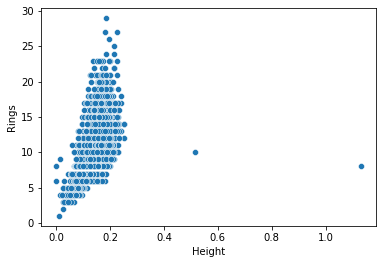

In [152]:
sns.scatterplot(x="Height", y="Rings",data=df)

<AxesSubplot:xlabel='Whole weight', ylabel='Rings'>

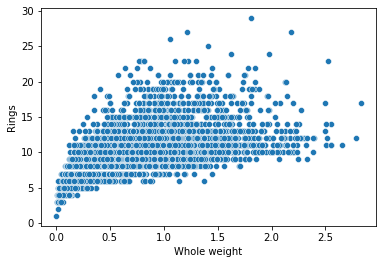

In [153]:
sns.scatterplot(x="Whole weight", y="Rings",data=df)

<AxesSubplot:xlabel='Shucked weight', ylabel='Rings'>

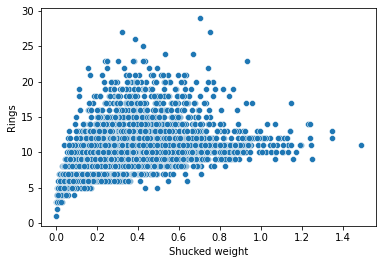

In [154]:
sns.scatterplot(x="Shucked weight", y="Rings",data=df)

<AxesSubplot:xlabel='Viscera weight', ylabel='Rings'>

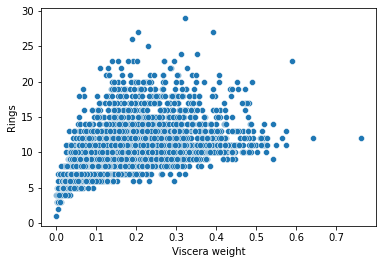

In [155]:
sns.scatterplot(x="Viscera weight", y="Rings",data=df)

<AxesSubplot:xlabel='Shell weight', ylabel='Rings'>

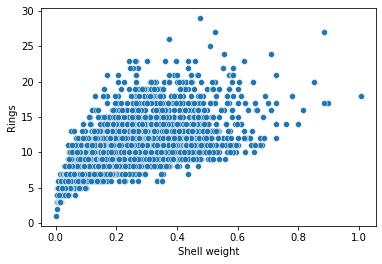

In [156]:
sns.scatterplot(x="Shell weight", y="Rings",data=df)

In [157]:
df.corr()

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
Height,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole weight,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked weight,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera weight,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell weight,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


<AxesSubplot:>

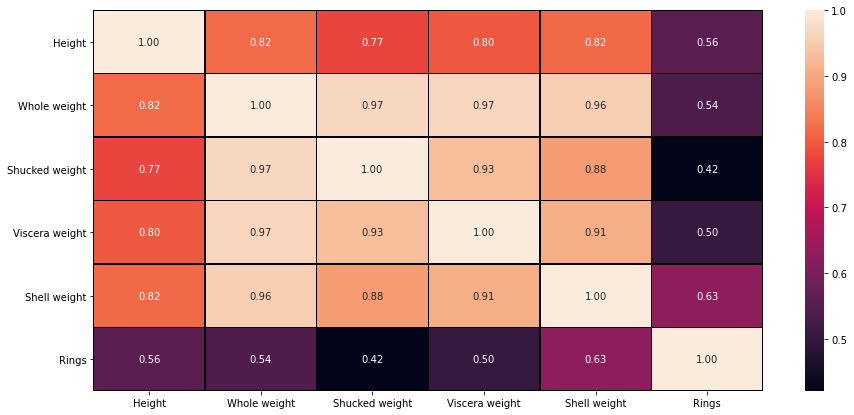

In [158]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt='.2f')

In [159]:
df.describe()

,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


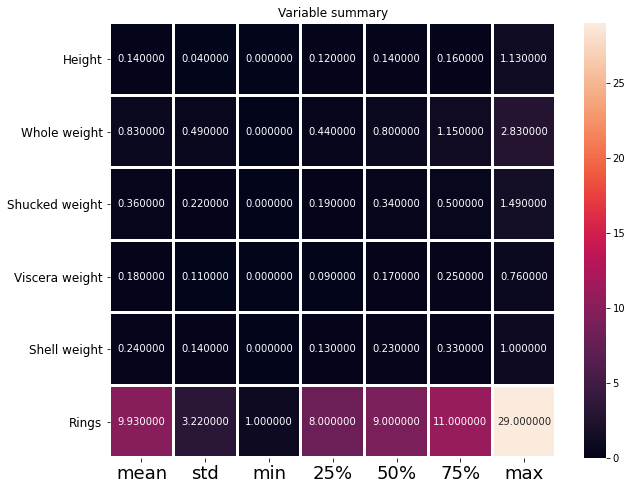

In [160]:
plt.figure(figsize=(10,8))
sns.heatmap(round(df.describe()[1:].transpose(),2),linewidth=2,annot=True,fmt="f")
plt.xticks(fontsize=18)
plt.yticks(fontsize=12)
plt.title("Variable summary")
plt.show()

In [161]:
df.skew()

Height            3.128817
Whole weight      0.530959
Shucked weight    0.719098
Viscera weight    0.591852
Shell weight      0.620927
Rings             1.114102
dtype: float64

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>]],
      dtype=object)

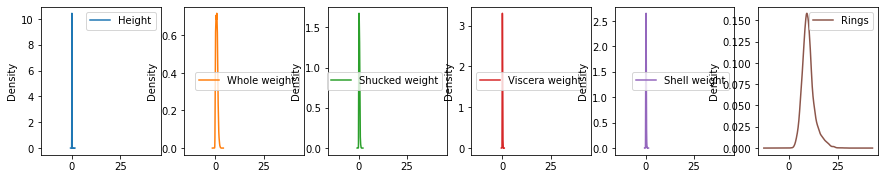

In [162]:
df.plot(kind='kde',subplots=True,layout=(2,6),figsize=(15,6))

In [163]:
delete = pd.DataFrame([["-0.639873","Length","No","Alot"],["-0.609198","Diameter","No","Alot"]],columns=["Correlation with Target","Column Name","Normalised","Outliers"])
delete

,Correlation with Target,Column Name,Normalised,Outliers
0,-0.639873,Length,No,Alot
1,-0.609198,Diameter,No,Alot


In [165]:
df=df.drop(["Length","Diameter"],axis=1)

In [166]:
df

,Sex,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,F,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.150,1.0945,0.5310,0.2610,0.2960,10


In [167]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Height          4177 non-null   float64
 2   Whole weight    4177 non-null   float64
 3   Shucked weight  4177 non-null   float64
 4   Viscera weight  4177 non-null   float64
 5   Shell weight    4177 non-null   float64
 6   Rings           4177 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 228.6+ KB


In [168]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [169]:
x

,Sex,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
0,M,0.095,0.5140,0.2245,0.1010,0.1500
1,M,0.090,0.2255,0.0995,0.0485,0.0700
2,F,0.135,0.6770,0.2565,0.1415,0.2100
3,M,0.125,0.5160,0.2155,0.1140,0.1550
4,I,0.080,0.2050,0.0895,0.0395,0.0550
...,...,...,...,...,...,...
4172,F,0.165,0.8870,0.3700,0.2390,0.2490
4173,M,0.135,0.9660,0.4390,0.2145,0.2605
4174,M,0.205,1.1760,0.5255,0.2875,0.3080
4175,F,0.150,1.0945,0.5310,0.2610,0.2960


In [170]:
y

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [171]:
from sklearn.model_selection import train_test_split

In [172]:
x_train,x_test,y_train,y_test=train_test_split(x,y, test_size=0.2,random_state=0)

In [173]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import accuracy_score

In [174]:
from sklearn.model_selection import train_test_split

# Predicting Length

In [175]:
results = preprocess_and_train(data, target='Length', task='regression')
print("Length Regression r^: {:.4f}".format(results))

Length Regression r^: 0.9753


# Predicting Sex

In [176]:
results = preprocess_and_train(data, target='Sex' , task='classification')
print("Sex classification Test Accuracy: {:.2f}%".format(results*100))

Sex classification Test Accuracy: 57.10%


# Predicting Diameter

In [177]:
results = preprocess_and_train(data, target='Diameter' , task='regression')
print("Diameter Regression R^2: {:.2f}%".format(results*100))

Diameter Regression R^2: 97.58%


# Predicting height Column

In [178]:
results = preprocess_and_train(data, target='Height' , task='regression')
print("Height Regression R^2: {:.4f}%".format(results))

Height Regression R^2: 0.8147%


# Predicted Shucked weight column

In [179]:
results = preprocess_and_train(data, target='Shucked weight' , task='regression')
print("Shucked weight Regression R^2: {:.4f}%".format(results))

Shucked weight Regression R^2: 0.9676%


# Predicted Shucked weight column

In [180]:
 df

,Sex,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...
4172,F,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.150,1.0945,0.5310,0.2610,0.2960,10


# Predicted Viscera weight column

In [181]:
results = preprocess_and_train(data, target='Viscera weight' , task='regression')
print("Viscera weight Regression R^2: {:.4f}%".format(results))

Viscera weight Regression R^2: 0.9462%


# Predicted Shell weight column

In [182]:
results = preprocess_and_train(data, target='Shell weight' , task='regression')
print("Shell weight Regression R^2: {:.4f}%".format(results))

Shell weight Regression R^2: 0.9511%


# Predicting height Column

In [183]:
results = preprocess_and_train(data, target='Whole weight' , task='regression')
print("Whole weight Regression R^2: {:.4f}%".format(results))

Whole weight Regression R^2: 0.9908%
